## **Часть 1. Прогнозирование**

Используя открытые источники информации, реализуйте прогноз динамики цен на:
- нефть марки Brent до конца 2025 года;
- золото до конца 2040 года

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install yfinance
# !pip install prophet
# !pip install scikit-learn
# !pip install requests
# !pip install bs4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from prophet import Prophet

In [3]:
# Загрузим данные из Yahoo Finance
brent_data = yf.download("BZ=F", "2010-01-01", "2024-12-31")
gold_data = yf.download("GC=F", "2010-01-01", "2024-12-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


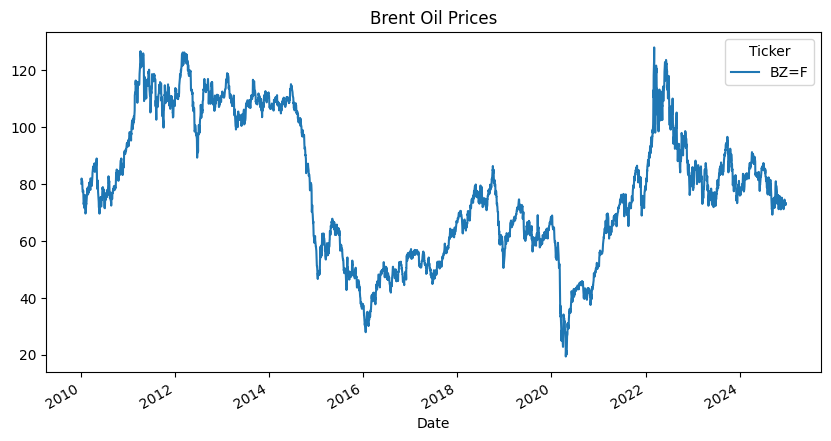

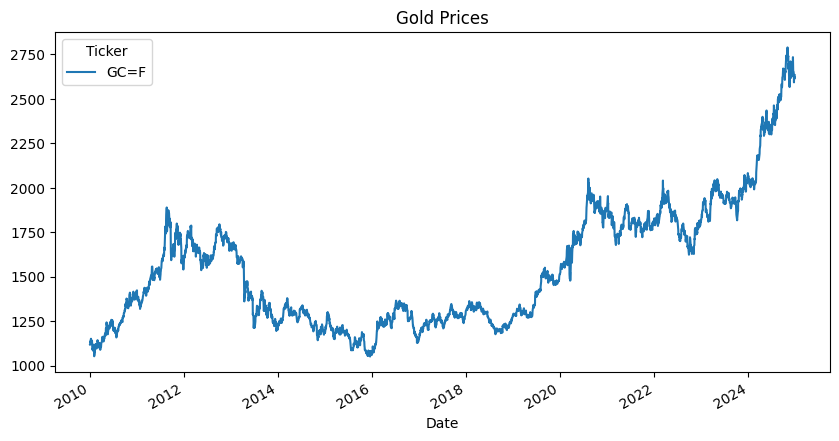

In [4]:
# Построим график цен на нефть и золото в разные годы
brent_data["Close"].plot(title="Brent Oil Prices", figsize=(10, 5))
gold_data["Close"].plot(title="Gold Prices", figsize=(10, 5))
plt.show()

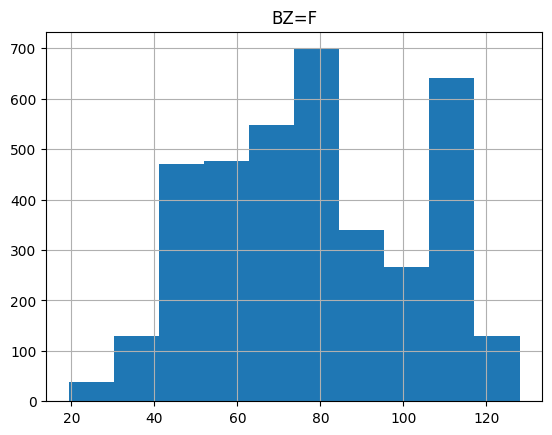

In [5]:
brent_data["Close"].hist();

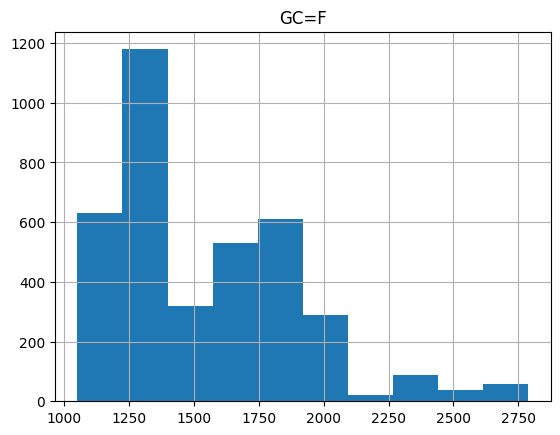

In [6]:
gold_data["Close"].hist();

*Видим, что распределение данных не является нормальным. Попробуем привести данные к нормальному распределению с помощью логарифмирования:*

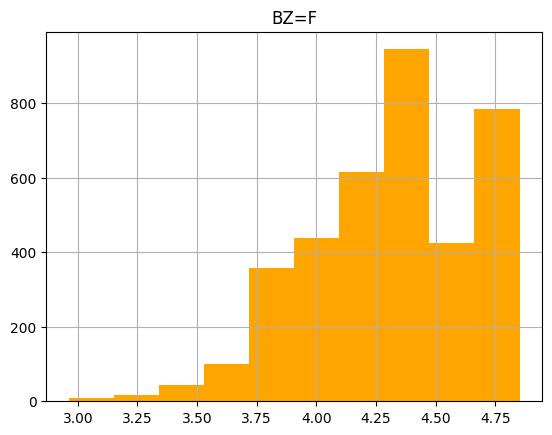

In [7]:
np.log(brent_data["Close"]).hist(color="orange");

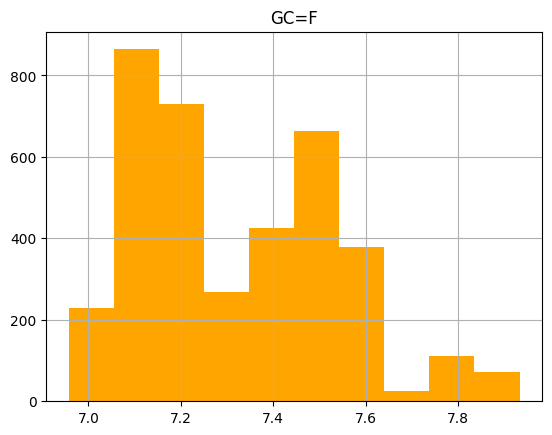

In [8]:
np.log(gold_data["Close"]).hist(color="orange");

*Логарифмирование не помогло. Учитывая это, будем использовать Prophet для предсказания цен.*

14:25:22 - cmdstanpy - INFO - Chain [1] start processing
14:25:24 - cmdstanpy - INFO - Chain [1] done processing


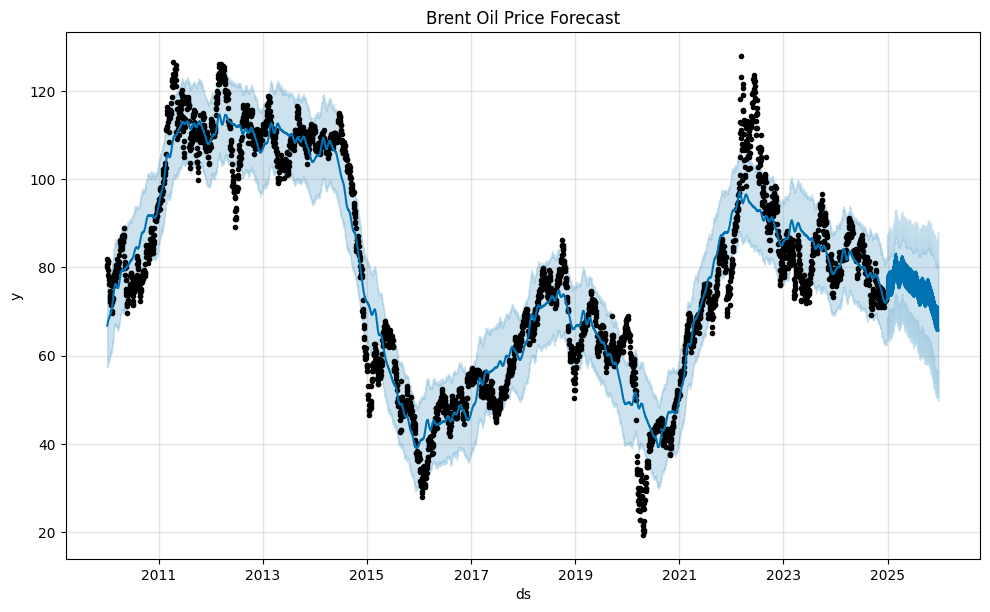

In [9]:
# Прогноз для нефти марки Brent до конца 2025
brent_df = brent_data.reset_index()[["Date", "Close"]]
brent_df.columns = ["ds", "y"]

prophet_model_brent = Prophet().fit(brent_df)
future_dates_brent = prophet_model_brent.make_future_dataframe(periods=365)
forecast_brent = prophet_model_brent.predict(future_dates_brent)

prophet_model_brent.plot(forecast_brent)
plt.title("Brent Oil Price Forecast")
plt.show()

*Наблюдаем тренд на снижение цены.*

14:25:27 - cmdstanpy - INFO - Chain [1] start processing
14:25:29 - cmdstanpy - INFO - Chain [1] done processing


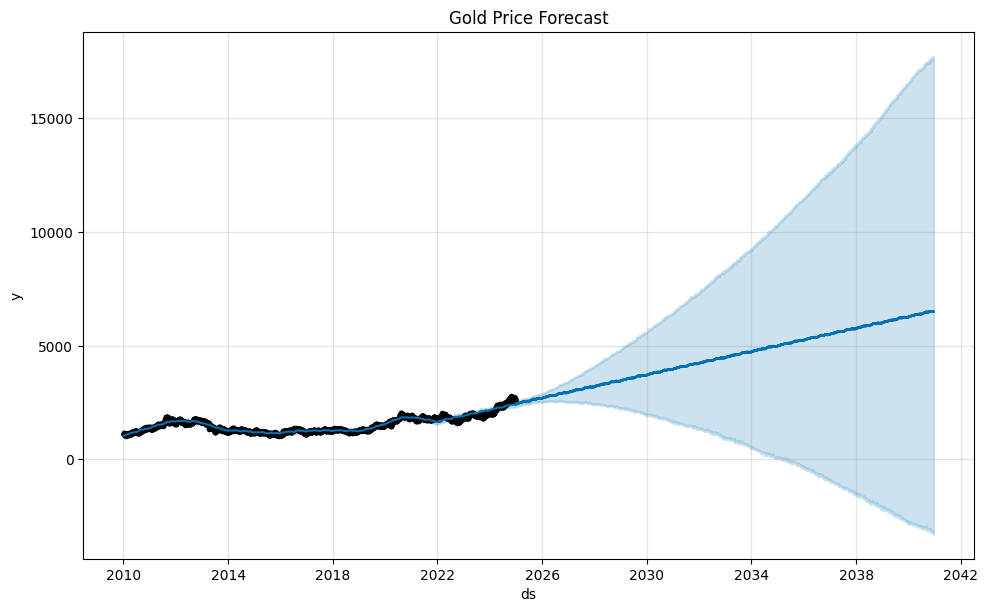

In [10]:
# Прогноз для золота до конца 2040 года
gold_df = gold_data.reset_index()[["Date", "Close"]]
gold_df.columns = ["ds", "y"]

prophet_model = Prophet().fit(gold_df)
future_dates = prophet_model.make_future_dataframe(periods=365 * 16)
forecast_gold = prophet_model.predict(future_dates)

prophet_model.plot(forecast_gold)
plt.title("Gold Price Forecast")
plt.show()

*Наблюдаем долгосрочную тенденцию к увеличению. Доверительный интервал достаточно широкий, потому что мы строим очень далекий прогноз.*

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import random

from __future__ import annotations

## **Часть 2. Логистическая регрессия**

Реализуйте логистическую регрессию, обучаемую с помощью двух видов градиенткого спуска:
- полный (по всем данным) градиентный спуск

- стохастический градиентный спуск

Во всех пунктах необходимо соблюдать два условия:
- Циклы можно использовать только для итераций градиентного спуска;
- В качестве критерия останова необходимо использовать (одновременно):

    - проверку на евклидову норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка 1e-6), задаваемого параметром `tolerance`;
    - достижение максимального числа итераций (например, 10000), задаваемого параметром `max_iter`.

Чтобы проследить, что оптимизационный процесс действительно сходится, добавьте атрибут класса `loss_history`. В нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций градиентного спуска, начиная с нулевой.

Инициализировать веса можно случайным образом или нулевым вектором.

In [12]:
from sklearn.base import BaseEstimator

In [13]:
# your code
class MyLogisticRegression(BaseEstimator):
    def __init__(self, gd_type='stochastic', tolerance=1e-6, max_iter=1000, eta=1e-2, w0=None):
        """
        Аргументы:
          gd_type: Вид градиентного спуска ('full' или 'stochastic').

          tolerance: Порог для остановки градиетного спуска.

          max_iter: Максимальное количество шагов в градиентном спуске.

          eta: Скорость обучения (learning rate).

          w0: Массив размерности d (d — количество весов в оптимизации).
              Начальные веса.
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.eta = eta
        self.w0 = w0
        self.loss_history = []
        self.sigmoid = lambda z: 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        """Обучаем модель на тренировочных данных. Сохраняем значения функции потерь после каждой итерации.

        Аргументы:
          X: Данные для обучения.

          y: Целевая переменная.

        Возвращает:
          self: Обученный регрессор.
        """
        n, d = X.shape
        self.w = self.w0 if self.w0 is not None else np.zeros(d)

        for iteration in range(self.max_iter):
            if self.gd_type == 'full':
                grad = self.calc_gradient(X, y)
            elif self.gd_type == 'stochastic':
                idx = np.random.randint(0, n)
                grad = self.calc_gradient(X[idx:idx+1], y[idx:idx+1])

            new_w = self.w - self.eta * grad
            self.loss_history.append(self.calc_loss(X, y))

            if np.linalg.norm(new_w - self.w) < self.tolerance:
                break

            self.w = new_w

        return self
    
    def predict_proba(self, X):
        """Вычислите вероятности положительного и отрицательного классов для каждого наблюдения.

        Аргументы:
          X: Массив размером (n, d).
             Данные.

        Возвращает:
             Массив размером (n, 2).
             Предсказанные вероятности.
        """
        probabilities = self.sigmoid(X @ self.w)
        return np.column_stack((1 - probabilities, probabilities))

    def predict(self, X):
        """Предсказание метки класса для каждого наблюдения.

        Аргументы:
          X: Массив размером (n, d).
             Данные.

        Возвращает:
             Массив размером (n,).
             Предсказанные метки классов.
        """
        probabilities = self.predict_proba(X)[:, 1]
        return (probabilities >= 0.5).astype(int)

    def calc_gradient(self, X, y):
        """Вычислите градиент функции потерь после каждой итерации.

        Аргументы:
          X: Массив размером (n, d), n может быть равно 1, если выбран 'stochastic'.
          y: Массив размером (n,).

        Возвращает:
          Массив размером (d,).
          Градиент функции потерь после текущей итерации.
        """
        n = X.shape[0]
        predictions = self.sigmoid(X @ self.w)
        return (1 / n) * (X.T @ (predictions - y))

    def calc_loss(self, X, y):
        """Вычислите значение функции потерь после каждой итерации.

        Аргументы:
          X: Массив размером (n, d).
          y: Массив размером (n,).

        Возвращает:
          Значение функции потерь после текущей итерации.
        """
        predictions = self.sigmoid(X @ self.w)
        return -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))

Далее предполагается, что вы используете собственную реализацию логистической регрессии.
Если с написанием класса возникли проблемы, используйте реализацию sklearn, чтобы не терять баллы за остальные задания.

Сгенерируем искусственные данные.

In [14]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=999)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=999)

Обучите логистическую регрессию на искусственных данных. Нарисуйте изменение лосса во время обучения.

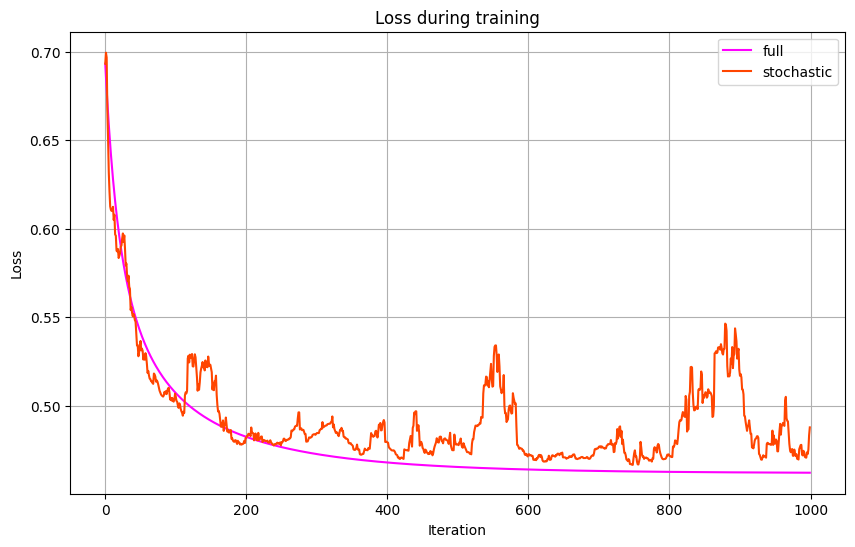

In [15]:
model_full = MyLogisticRegression(gd_type='full')
model_full.fit(X_train, y_train)

model_stochastic = MyLogisticRegression(gd_type='stochastic')
model_stochastic.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plt.plot(model_full.loss_history, color="magenta", label="full")
plt.plot(model_stochastic.loss_history, color="orangered", label="stochastic")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss during training")
plt.legend()
plt.grid()
plt.show()

*Видим, что оба вида градиентного спуска сошлись. Полный градиентный спуск при этом сходился намного плавнее, чем стохастический, как и ожидалось.*

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

In [16]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, auc

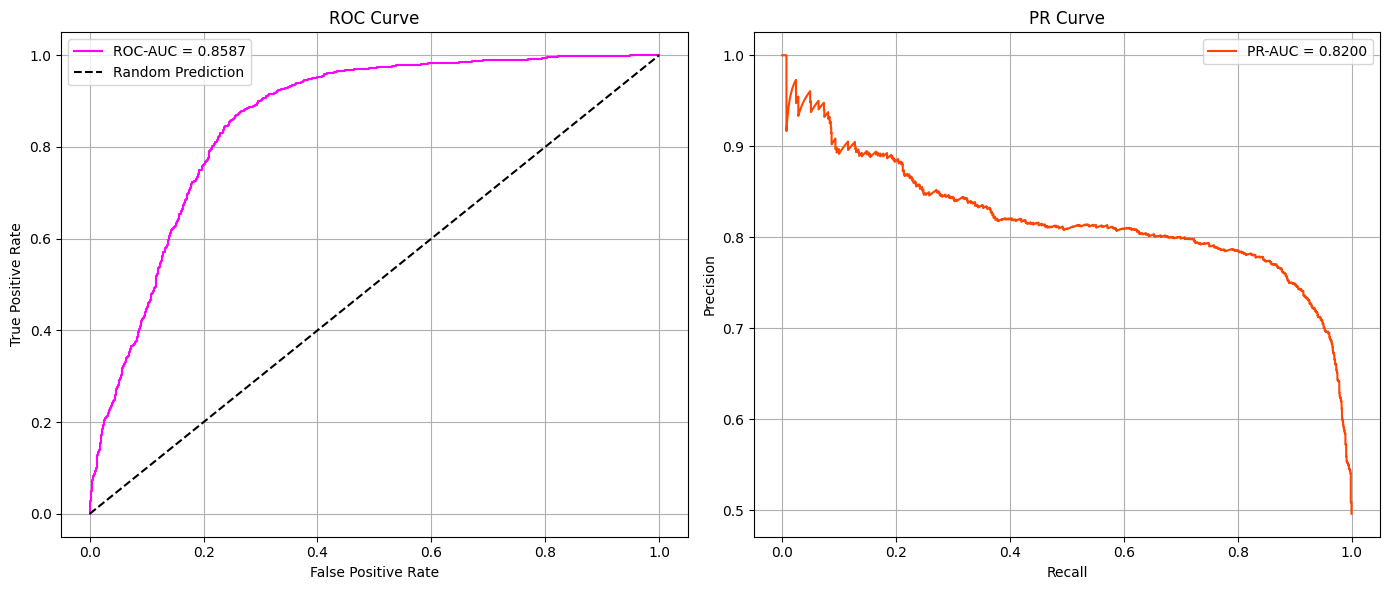

ROC-AUC: 0.85868
PR-AUC:  0.81999


In [17]:
y_pred_proba = model_full.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.4f}", color="magenta")
plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"PR-AUC = {pr_auc:.4f}", color="orangered")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

print(f"ROC-AUC: {roc_auc:.5f}")
print(f"PR-AUC:  {pr_auc:.5f}")

Результат получился почти одинаковым?

*Да, значения метрик очень близки.*

Оцените ошибку ROC-AUC и PR-AUC вашей модели при помощи K-fold кросс валидации.  

In [18]:
from sklearn.model_selection import KFold

In [19]:
kf = KFold(n_splits=5, shuffle=True, random_state=999)

roc_auc_scores = []
pr_auc_scores = []

for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X[train_index], X[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]
    
    model = MyLogisticRegression(gd_type='full')
    model.fit(X_train_cv, y_train_cv)
    y_pred_proba_cv = model.predict_proba(X_test_cv)[:, 1]
    
    roc_auc_scores.append(roc_auc_score(y_test_cv, y_pred_proba_cv))
    precision, recall, _ = precision_recall_curve(y_test_cv, y_pred_proba_cv)
    pr_auc_scores.append(auc(recall, precision))

mean_roc_auc = np.mean(roc_auc_scores)
mean_pr_auc = np.mean(pr_auc_scores)

print(f"Mean ROC-AUC: {mean_roc_auc:.5f}")
print(f"Mean PR-AUC:  {mean_pr_auc:.5f}")

Mean ROC-AUC: 0.86086
Mean PR-AUC:  0.83216


*Значения метрик немного улучшились.*

## **Часть 3. Решающие деревья**

Здесь требуется реализовать разбиение элементов выборки в вершине дерева.

$R_m$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения.

Критерий ошибки:

$$
Q(R_m, j, t) = \frac{|R_\ell|}{|R_m|}H(R_\ell) + \frac{|R_r|}{|R_m|}H(R_r) \to \min_{j, t}
$$

$R_\ell$ - множество объектов в левом поддереве, $R_r$ - множество объектов в правом поддереве.

$H(R)$ - критерий информативности, с помощью которого можно оценить качество распределения целевой переменной среди объектов множества $R$.

In [20]:
from typing import Iterable, List, Tuple, Optional

Так как Boston Dataset с недавних пор отсутствует в sklearn, то ниже реализован способ загрузки данного датасета из другого источника.

In [21]:
# `load_boston` has been removed from scikit-learn since version 1.2.

# from sklearn.datasets import load_boston
# boston = load_boston()

In [22]:
# !wget -i https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/datasets/data/boston_house_prices.csv
# data_git = pd.read_csv('boston_house_prices.csv', sep="\s+")

**Data Set Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
.. topic:: References

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.



In [23]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\chizh\AppData\Local\Temp\ipykernel_1636\16828617.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [24]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

X = pd.DataFrame(data, columns=feature_names, index=range(len(data)))
y = pd.DataFrame(target, columns=['MEDV'], index=range(len(target)))

X['target'] = y

In [25]:
X_train, X_test = train_test_split(X, test_size=0.25, random_state=999)

Реализуйте подсчет критерия ошибки. Для этого реализуйте функции для подсчета значения критерия информативности, а также для разбиения вершины.

In [26]:
# your code
def H(R: np.array) -> float:
    """
    Вычислить критерий информативности (impurity criterion) для фиксированного набора объектов R.
    Предполагается, что последний столбец содержить целевую переменную.
    """
    if len(R) == 0:
        return 0.0
    target = R[:, -1]
    # Используем дисперсию, так как будем решать задачу регрессии
    return np.mean((target - np.mean(target)) ** 2)


def split_node(R_m: np.array, feature: str, t: float) -> Iterable[np.array]:
    """
    Разделить фиксированный набор объектов R_m с заданным признаком (номером признака) и пороговым значением t.
    """
    left = R_m[R_m[:, feature] <= t]
    right = R_m[R_m[:, feature] > t]
    return left, right


def q_error(R_m: np.array, feature: str, t: float) -> float:
    """
    Вычислить критерий ошибки для заданных параметров разделения.
    """
    left, right = split_node(R_m, feature, t)
    H_left = H(left)
    H_right = H(right)
    N_m = len(R_m)
    N_left, N_right = len(left), len(right)

    return (N_left / N_m) * H(left) + (N_right / N_m) * H(right)

Переберите все возможные разбиения обучающей выборки по одному из признаков и постройте график критерия ошибки в зависимости от значения порога.

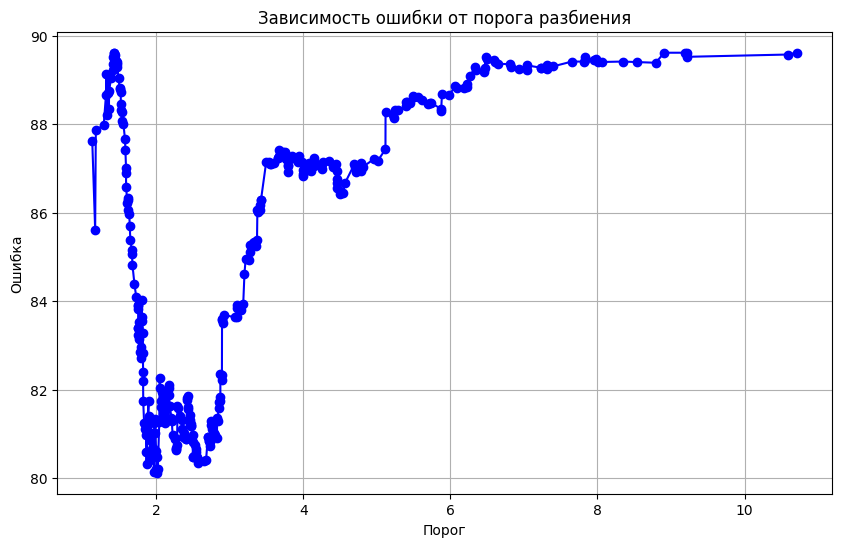

In [27]:
feature_index = 7
R_m = X_train.values
thresholds = np.unique(R_m[:, feature_index])

errors = [q_error(R_m, feature_index, t) for t in thresholds]

plt.figure(figsize=(10, 6))
plt.plot(thresholds, errors, marker='o', linestyle='-', color='b')
plt.xlabel("Порог")
plt.ylabel("Ошибка")
plt.title("Зависимость ошибки от порога разбиения")
plt.grid()
plt.show()

Напишите функцию, находящую оптимальное разбиение данной вершины по данному признаку.

In [28]:
def find_best_split(R_m: np.array, feature: str) -> Tuple[float, float]:
    """
    Функция, находящая оптимальное разбиение данной вершины по данному признаку.
    """
    thresholds = np.unique(R_m[:, feature])
    best_threshold = None
    min_error = float('inf')

    for t in thresholds:
        error = q_error(R_m, feature, t)
        if error < min_error:
            min_error = error
            best_threshold = t

    return best_threshold, min_error

In [29]:
find_best_split(R_m, 7)[0]

2.0048

*Получили такое же значение порога, как на графике.*

Для первого разбиения найдите признак, показывающий наилучшее качество. Каков порог разбиения и значение качества? Постройте график критерия ошибки для данного признака в зависимости от значения порога.

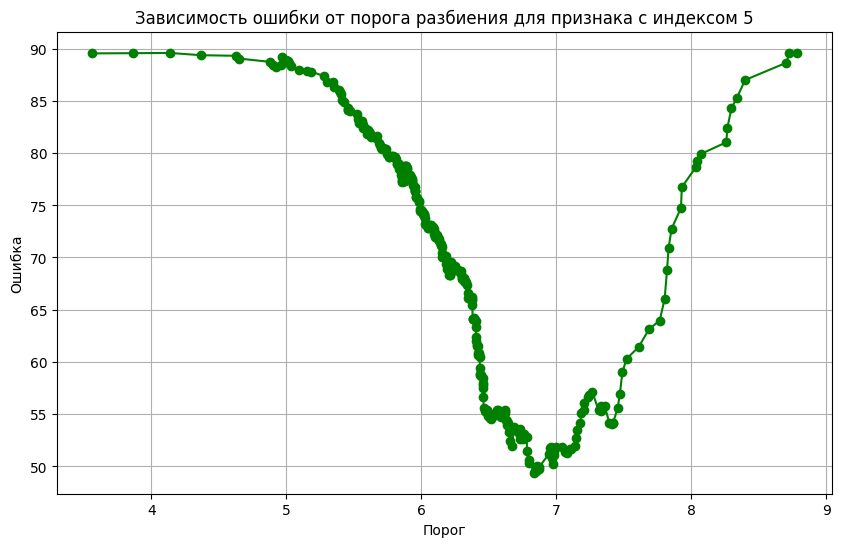

Наилучший признак:    5
Наилучший порог:      6.833
Наилучшее качество:   49.38


In [30]:
best_feature = None
best_threshold = None
min_error = float('inf')

for feature in range(R_m.shape[1] - 1):
    threshold, error = find_best_split(R_m, feature)
    if error < min_error:
        min_error = error
        best_threshold = threshold
        best_feature = feature

thresholds = np.unique(R_m[:, best_feature])
errors = [q_error(R_m, best_feature, t) for t in thresholds]

plt.figure(figsize=(10, 6))
plt.plot(thresholds, errors, marker='o', linestyle='-', color='g')
plt.xlabel("Порог")
plt.ylabel("Ошибка")
plt.title(f"Зависимость ошибки от порога разбиения для признака с индексом {best_feature}")
plt.grid()
plt.show()

print(f"Наилучший признак:    {best_feature}")
print(f"Наилучший порог:      {best_threshold}")
print(f"Наилучшее качество:   {min_error:.2f}")

Изобразите разбиение визуально. Для этого постройте диаграмму рассеяния целевой переменной в зависимости от значения входного признака. Далее изобразите вертикальную линию, соответствующую порогу разбиения.

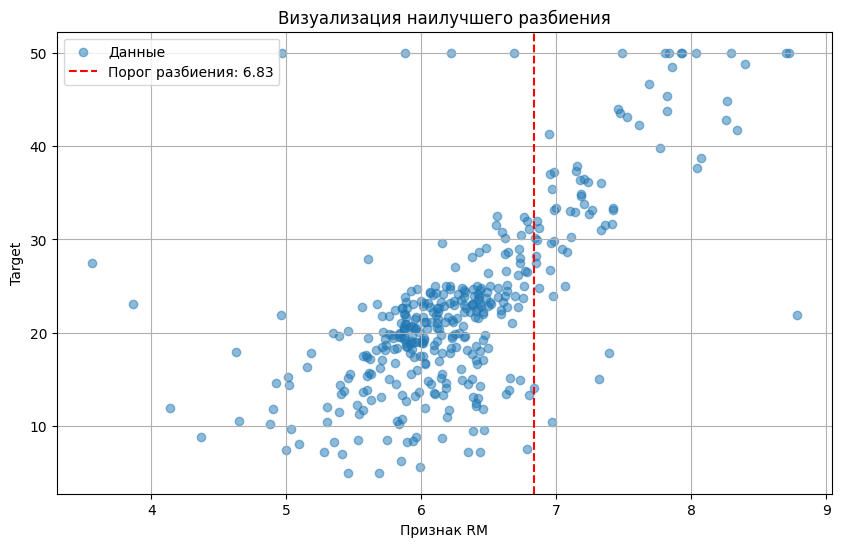

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(R_m[:, best_feature], R_m[:, -1], alpha=0.5, label="Данные")
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f"Порог разбиения: {best_threshold:.2f}")
plt.xlabel("Признак " + feature_names[best_feature])
plt.ylabel("Target")
plt.title("Визуализация наилучшего разбиения")
plt.legend()
plt.grid()
plt.show()

## **Часть 5. Парсинг**

Необходимо написать парсер, позволяющий получить список компаний, находящихся в санционных списках Евросоюза
- сайт (https://anti-russian-sanctions.ru/company/?arrFilter_ff%5BNAME%5D=&arrFilter_pf%5BINN%5D=&arrFilter_pf%5BENG%5D=&arrFilter_pf%5BNUMBER_OFAC%5D=&arrFilter_pf%5BNUMBER_EUR%5D=&arrFilter_pf%5BSPISOK%5D%5B0%5D=43&arrFilter_pf%5BCITY%5D=&arrFilter_pf%5BCOUNTRY%5D=&arrFilter_pf%5BSWIFT_BIC%5D=&arrFilter_pf%5BCREDIT_INSTITUTION%5D=&set_filter=Y&PAGEN_1=5)

- Результат - таблица в Excel, где в 1-м столбце содержится номер ИНН, а во 2-м - номер в списках Евросоюза (при отсутствии значений вернуть None)

In [32]:
import requests
from bs4 import BeautifulSoup

In [33]:
BASE_URL = "https://anti-russian-sanctions.ru/company/"

PARAMS = {
    "arrFilter_ff[NAME]": "",
    "arrFilter_pf[INN]": "",
    "arrFilter_pf[ENG]": "",
    "arrFilter_pf[NUMBER_OFAC]": "",
    "arrFilter_pf[NUMBER_EUR]": "",
    "arrFilter_pf[SPISOK][0]": "43",
    "arrFilter_pf[CITY]": "",
    "arrFilter_pf[COUNTRY]": "",
    "arrFilter_pf[SWIFT_BIC]": "",
    "arrFilter_pf[CREDIT_INSTITUTION]": "",
    "set_filter": "Y",
    "PAGEN_1": 1,
}


def get_page_data(page_number: int) -> Tuple[List[Tuple[Optional[str], Optional[str]]], bool]:
    PARAMS["PAGEN_1"] = page_number
    response = requests.get(BASE_URL, params=PARAMS)
    soup = BeautifulSoup(response.text, "html.parser")

    navigation_pages = soup.find('div', class_='navigation-pages')
    last_child = navigation_pages.contents[-2]
    is_last_page = last_child and last_child.name == 'span' and 'nav-current-page' in last_child.get('class', [])

    company_blocks = soup.select("p.news-item")
    data = []

    for block in company_blocks:
        inn = None
        number_eur = None

        inn_tag = block.find("small", string=lambda t: t and "ИНН:" in t)
        if inn_tag:
            inn = inn_tag.text.split(maxsplit=1)[1].strip()

        number_eur_tag = block.find("small", string=lambda t: t and "Номер в списках Евросоюза:" in t)
        if number_eur_tag:
            number_eur = number_eur_tag.text.split()[-1]
        
        if inn or number_eur:
            data.append((inn, number_eur))

    return data, is_last_page
    

def parse_all_pages() -> List[Tuple[Optional[str], Optional[str]]]:
    all_data = []
    page_number = 1
    last_page_flag = False

    print(f"Парсинг страницы ", end="")
    while not last_page_flag:
        page_data, last_page_flag = get_page_data(page_number)
        print(page_number, end=", " if not last_page_flag else ".")
        all_data.extend(page_data)
        page_number += 1

    return all_data

In [34]:
data = parse_all_pages()

df = pd.DataFrame(data, columns=["ИНН", "Номер в списке Евросоюза"])
df.to_excel("sanctioned_companies.xlsx", index=False)

Парсинг страницы 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18.